In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (7,5)
import warnings
warnings.filterwarnings("ignore")
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score, make_scorer,recall_score
from sklearn.ensemble import RandomForestClassifier
#from keras.models import Sequential
#from keras.layers import Dense, Dropout
#from keras.callbacks import EarlyStopping
#from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.metrics import jaccard_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report
#from tensorflow import keras
#from tensorflow.keras import layers
#from keras.models import model_from_json
from sklearn.decomposition import PCA

In [ ]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [ ]:
df = pd.read_csv('Loan_status_2007-2020Q3.gzip', low_memory=False)
df.head()

In [ ]:
df = df_original.copy()

In [ ]:
df.loan_status.value_counts()

In [ ]:
# We are interested in working only with the fully paid and charged off loans.
# The rest of the categories represent loans that are in the process of payment 
# and it will take some time to evaluate if they are fully payed or not.

In [ ]:
df = df[df['loan_status'].isin(['Fully Paid','Charged Off'])]

In [ ]:
df.loan_status.value_counts()

Fully Paid     1497783
Charged Off     362548
Name: loan_status, dtype: int64

In [ ]:
df.shape

(1860331, 142)

In [ ]:
df_original.shape  # We got rid of almost 1 MM records

(2925493, 142)

In [ ]:
df.to_csv('lending_club.csv',index=False)

In [46]:
df = pd.read_csv('lending_club.csv')

In [3]:
df.head()

,Unnamed: 0,Unnamed: 0.1,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,...,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,debt_settlement_flag
0,0,0,1077501,5000.0,5000.0,4975.0,36 months,10.65%,162.87,B,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N
1,1,1,1077430,2500.0,2500.0,2500.0,60 months,15.27%,59.83,C,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N
2,2,2,1077175,2400.0,2400.0,2400.0,36 months,15.96%,84.33,C,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N
3,3,3,1076863,10000.0,10000.0,10000.0,36 months,13.49%,339.31,C,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N
4,4,4,1075358,3000.0,3000.0,3000.0,60 months,12.69%,67.79,B,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N


In [4]:
# Deleting columns we are not going to use before doing EDA 
df.drop(['Unnamed: 0','Unnamed: 0.1','id','url',],axis=1,inplace=True)

In [5]:
# First we convert the interest rate to a float
df[['int_rate']] = df[['int_rate']].apply(lambda x:x.str.strip('%'))
df[['int_rate']] = df[['int_rate']].apply(lambda x:x.astype(float))

In [6]:
# almost 100% of the loans

In [7]:
df['application_type'].value_counts(dropna=False)

Individual    1790838
Joint App       69493
Name: application_type, dtype: int64

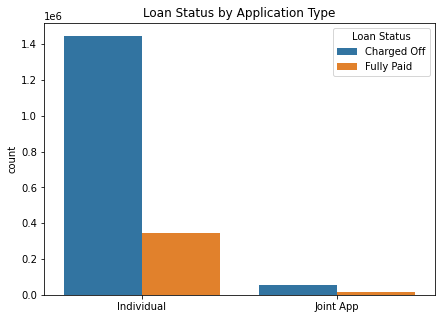

In [8]:
# Loan Status by Application Type 
sns.countplot(data=df, x="application_type",  hue="loan_status").set(title='Loan Status by Application Type',xlabel= '')
plt.legend(labels=["Charged Off","Fully Paid"], title = "Loan Status")

In [9]:
# setting the null values of annual income joint equal to its individual annual income 
df.loc[df['annual_inc_joint'].isnull(),'annual_inc_joint'] = df[df['annual_inc_joint'].isnull()]['annual_inc']  

In [10]:
# setting the null values of dti joint equal to its individual dti  
df.loc[df['dti_joint'].isnull(),'dti_joint'] = df[df['dti_joint'].isnull()]['dti']  

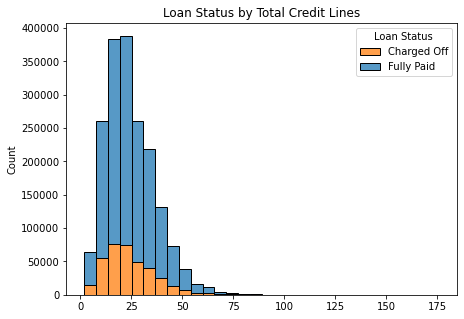

In [11]:
# Loan Status by Total Credit Lines
sns.histplot(data=df, x="total_acc", hue="loan_status", multiple="stack", bins=30).set(title='Loan Status by Total Credit Lines',xlabel='')
plt.legend(labels=["Charged Off","Fully Paid"], title = "Loan Status")

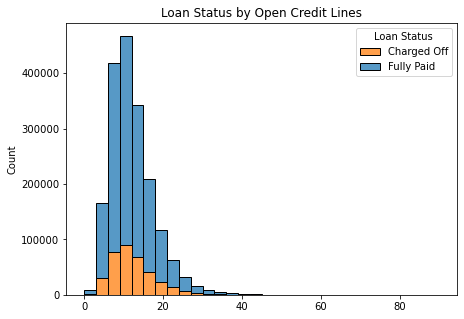

In [12]:
# Loan Status by Open Credit Lines
sns.histplot(data=df, x="open_acc", hue="loan_status", multiple="stack", bins=30).set(title='Loan Status by Open Credit Lines',xlabel='')
plt.legend(labels=["Charged Off","Fully Paid"], title = "Loan Status")

<AxesSubplot:>

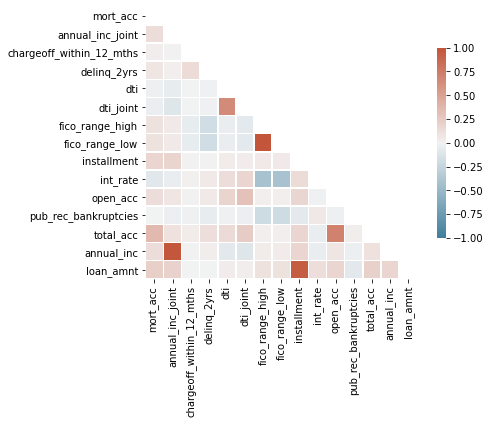

In [ ]:
# Compute the correlation matrix
corr = df[['mort_acc','annual_inc_joint','chargeoff_within_12_mths','delinq_2yrs','dti','dti_joint','fico_range_high','fico_range_low','installment','int_rate','open_acc','pub_rec_bankruptcies','total_acc','annual_inc','loan_amnt']].corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(7, 5))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1,vmin=-1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .7})

In [ ]:
# We observe correlations between annual_inc and annul_inc_joint, dti and dti_joint, installment and loan_amount, open_account and total_account, int_rate and fico_range(low and high)

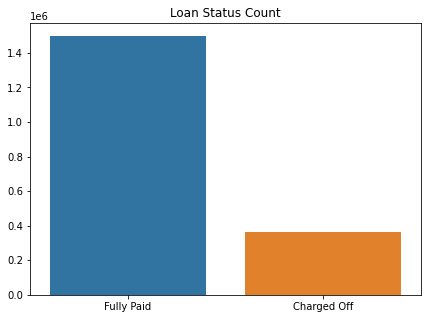

In [ ]:
# Loan Status Count
sns.barplot(x=df.loan_status.value_counts().index, y=df.loan_status.value_counts()).set(title='Loan Status Count',xlabel="", ylabel='')
plt.show()

In [ ]:
df.loan_status.value_counts()

Fully Paid     1497783
Charged Off     362548
Name: loan_status, dtype: int64

In [ ]:
df.term.value_counts()

 36 months    1393299
 60 months     467032
Name: term, dtype: int64

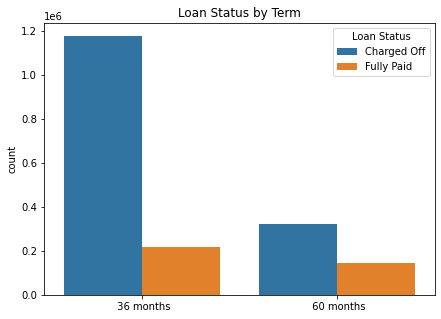

In [ ]:
# Loan Status by Term 
sns.countplot(data=df, x="term",  hue="loan_status").set(title='Loan Status by Term',xlabel= '')
plt.legend(labels=["Charged Off","Fully Paid"], title = "Loan Status")

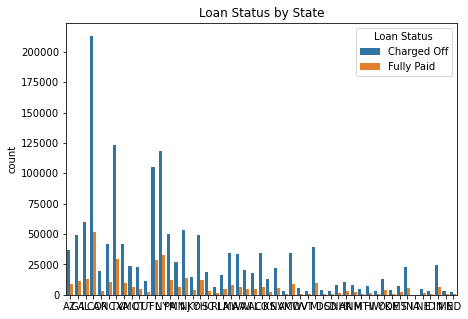

In [ ]:
# Loan Status by State  => draw a map ! 
sns.countplot(data=df, x="addr_state",  hue="loan_status").set(title='Loan Status by State',xlabel= '')
plt.legend(labels=["Charged Off","Fully Paid"], title = "Loan Status")

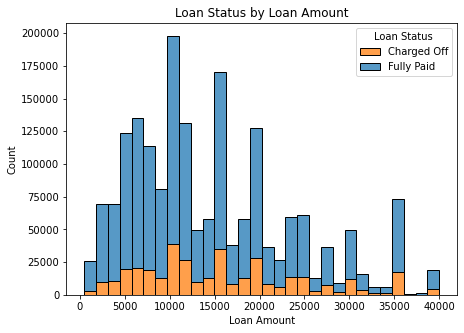

In [ ]:
# Loan Status by Loan Amount 
sns.histplot(data=df, x="loan_amnt", hue="loan_status", multiple="stack", bins=30).set(title='Loan Status by Loan Amount',xlabel='Loan Amount')
plt.legend(labels=["Charged Off","Fully Paid"], title = "Loan Status")

<AxesSubplot:xlabel='loan_amnt'>

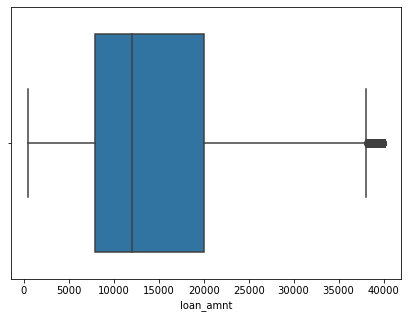

In [42]:
sns.boxplot(df[df['loan_amnt']<500000]['loan_amnt'])

In [ ]:
# Loan Status by Anual Income

In [ ]:
# We notice that there are several outliers further away from the 75th quantile + 1.5 the IQR
df.annual_inc.describe()

count    1.860331e+06
mean     7.736956e+04
std      1.178218e+05
min      0.000000e+00
25%      4.600000e+04
50%      6.500000e+04
75%      9.200000e+04
max      1.100000e+08
Name: annual_inc, dtype: float64

<AxesSubplot:xlabel='annual_inc'>

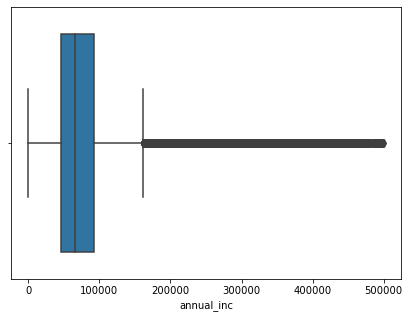

In [ ]:
# Boxplot of annual income
sns.boxplot(df[df['annual_inc']<500000]['annual_inc'])

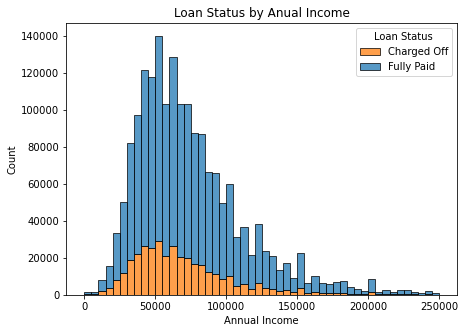

In [ ]:
# Histogram showing annual incomes up to $ 250.000
sns.histplot(data=df[df['annual_inc']<250000], x="annual_inc", hue="loan_status", multiple="stack", bins=50).set(title='Loan Status by Anual Income',xlabel='Annual Income')
plt.legend(labels=["Charged Off","Fully Paid"], title = "Loan Status")

In [ ]:
# Loan Status by Installments

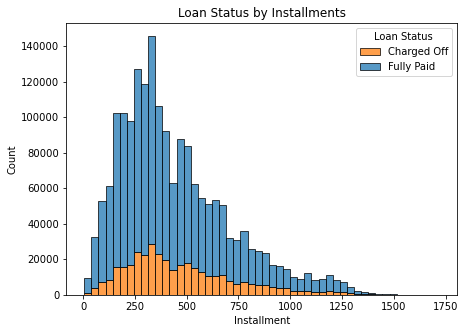

In [ ]:
sns.histplot(data=df, x="installment", hue="loan_status", multiple="stack", bins=50).set(title='Loan Status by Installments',xlabel='Installment')
plt.legend(labels=["Charged Off","Fully Paid"], title = "Loan Status")

In [ ]:
# Loan Status by Ratio Obligations/Income

<AxesSubplot:xlabel='dti'>

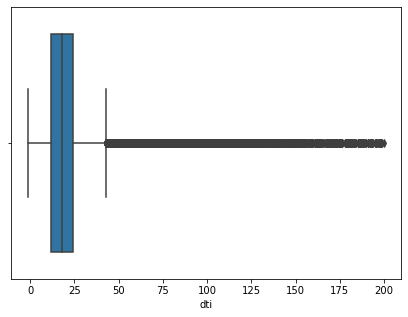

In [ ]:
# We notice there are several outliers
# there are people who have very low income per month in relation to their obligations (excluding mortgage and LC loan)
sns.boxplot(df[df['dti']<200]['dti'])

In [45]:
df['dti'].describe()

count    1.859223e+06
mean     1.856774e+01
std      1.309153e+01
min     -1.000000e+00
25%      1.182000e+01
50%      1.771000e+01
75%      2.429000e+01
max      9.990000e+02
Name: dti, dtype: float64

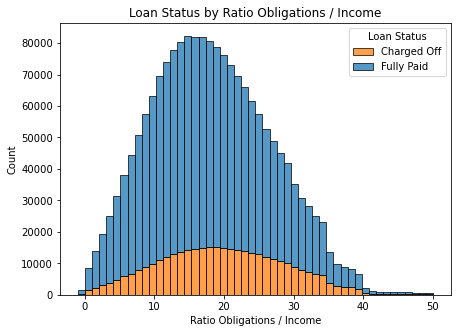

In [ ]:
sns.histplot(data=df[df['dti']<50], x="dti", hue="loan_status", multiple="stack", bins=50).set(title='Loan Status by Ratio Obligations / Income',xlabel='Ratio Obligations / Income')
plt.legend(labels=["Charged Off","Fully Paid"], title = "Loan Status")

In [ ]:
# Loan Status by Interest Rate

<AxesSubplot:xlabel='int_rate'>

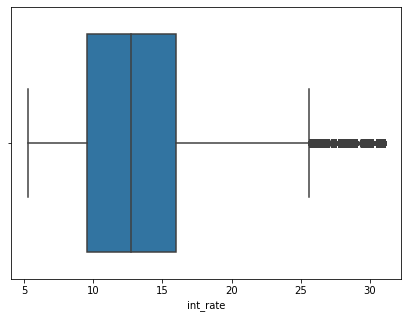

In [44]:
# Boxplot of interest rate
sns.boxplot(df[df['int_rate']<50]['int_rate'])

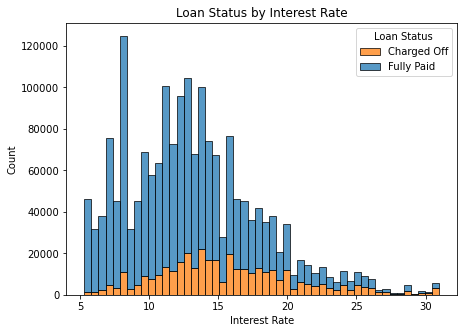

In [ ]:
sns.histplot(data=df, x="int_rate", hue="loan_status", multiple="stack", bins=50).set(title='Loan Status by Interest Rate',xlabel='Interest Rate')
plt.legend(labels=["Charged Off","Fully Paid"], title = "Loan Status")

In [ ]:
# Loan Status by Issue Date

In [ ]:
data = pd.concat([pd.to_datetime(df.issue_d),df.loan_status],axis=1).reset_index()

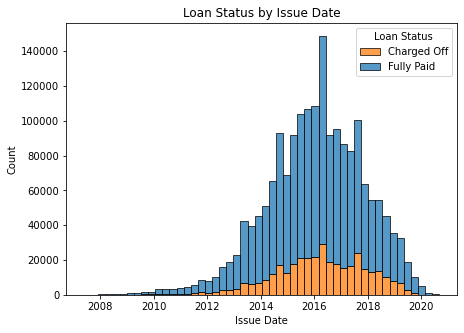

In [ ]:
sns.histplot(data=data, x="issue_d", hue="loan_status", multiple="stack", bins=50).set(title='Loan Status by Issue Date',xlabel='Issue Date')
plt.legend(labels=["Charged Off","Fully Paid"], title = "Loan Status")

In [ ]:
# Loan Status by Grade

In [ ]:
grade_loan = df.groupby(['grade','loan_status'])['loan_status'].count().unstack()
grade_loan['Sum'] = grade_loan.iloc[:,0] + grade_loan.iloc[:,1]
grade_loan = grade_loan.sort_values(by='Sum',ascending=False)
grade = grade_loan.index
charged = grade_loan.iloc[:,0]
fully = grade_loan.iloc[:,1]

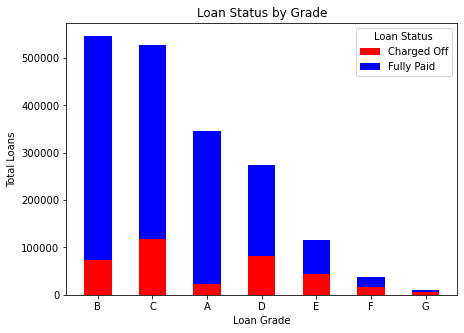

In [ ]:
fig, ax = plt.subplots()  
labels = grade  
width=0.5
plt.bar(labels, charged, width, color="red")
plt.bar(labels, fully, width ,color="blue", bottom=np.array(charged))
plt.xticks(fontsize=10) 
plt.yticks(fontsize=10)
ax.set_ylabel('Total Loans')
ax.set_xlabel('Loan Grade')
ax.set_title('Loan Status by Grade')
ax.legend(labels=["Charged Off","Fully Paid"], title = "Loan Status")

plt.show()

In [ ]:
# Loan Status by Subgrade

In [ ]:
grade_loan = df.groupby(['sub_grade','loan_status'])['loan_status'].count().unstack()
grade_loan['Sum'] = grade_loan.iloc[:,0] + grade_loan.iloc[:,1]
grade_loan = grade_loan.sort_values(by='Sum',ascending=False)
grade = grade_loan.index
charged = grade_loan.iloc[:,0]
fully = grade_loan.iloc[:,1]

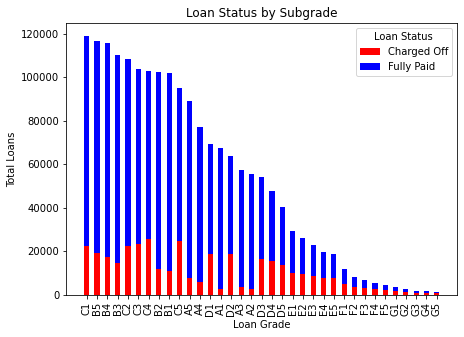

In [ ]:
fig, ax = plt.subplots()  
labels = grade  
width=0.5
plt.bar(labels, charged, width, color="red")
plt.bar(labels, fully, width ,color="blue", bottom=np.array(charged))
plt.xticks(fontsize=10) 
plt.yticks(fontsize=10)
ax.set_ylabel('Total Loans')
ax.set_xlabel('Loan Grade')
ax.set_title('Loan Status by Subgrade')
ax.legend(labels=["Charged Off","Fully Paid"], title = "Loan Status")
plt.xticks(rotation='vertical')


plt.show()

In [ ]:
# Loan Status by Home Ownership

In [ ]:
home_loan = df.groupby(['home_ownership','loan_status'])['loan_status'].count().unstack()
home_loan['Sum'] = home_loan.iloc[:,0] + home_loan.iloc[:,1]
home_loan = home_loan.sort_values(by='Sum',ascending=False)
home = home_loan.index
charged = home_loan.iloc[:,0]
fully = home_loan.iloc[:,1]

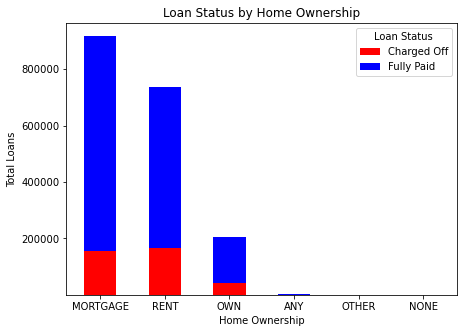

In [ ]:
fig, ax = plt.subplots()  
labels = home  
width=0.5
plt.bar(labels, charged, width, color="red")
plt.bar(labels, fully, width ,color="blue", bottom=np.array(charged))
plt.xticks(fontsize=10) 
plt.yticks(fontsize=10)
ax.set_ylabel('Total Loans')
ax.set_xlabel('Home Ownership')
ax.set_title('Loan Status by Home Ownership')
ax.legend(labels=["Charged Off","Fully Paid"], title = "Loan Status")

plt.show()

In [ ]:
# Loan Status by Mortgage Accounts

In [ ]:
# Loan Status by Open Credit Lines
mort_loan = df.groupby(['mort_acc','loan_status'])['loan_status'].count().unstack()
mort_loan['Sum'] = mort_loan.iloc[:,0] + mort_loan.iloc[:,1]
mort_loan = mort_loan.sort_values(by='Sum',ascending=False)
mort = mort_loan.index[:15]
charged = mort_loan.iloc[:15,0]
fully = mort_loan.iloc[:15,1]

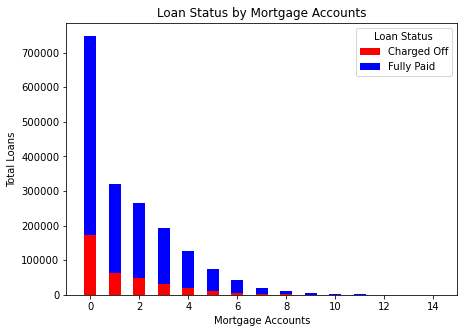

In [ ]:
fig, ax = plt.subplots()  
labels = mort  
width=0.5
plt.bar(labels, charged, width, color="red")
plt.bar(labels, fully, width ,color="blue", bottom=np.array(charged))
plt.xticks(fontsize=10) 
plt.yticks(fontsize=10)
ax.set_ylabel('Total Loans')
ax.set_xlabel('Mortgage Accounts')
ax.set_title('Loan Status by Mortgage Accounts')
ax.legend(labels=["Charged Off","Fully Paid"], title = "Loan Status")

plt.show()

In [ ]:
# Loan Status by Employment Title

In [ ]:
# First we capitalize the first letter of each employment title
df['emp_title'] = df['emp_title'].str.capitalize()

In [ ]:
# Then we select the top 30 employment titles
title = df['emp_title'].value_counts().sort_values(ascending=False)[:30].index 

In [ ]:
# Then we filter the loans status by those titles
loans = df[df['emp_title'].isin(title)].groupby(['emp_title','loan_status'])['loan_status'].count().values

In [ ]:
# We create a dataframe of employment titles grouped by loan status, then we use unstack to separete the index results
tit_loan = df[df['emp_title'].isin(title)].groupby(['emp_title','loan_status'])['loan_status'].count().unstack()

In [ ]:
# We sum the results charged off and fully paid and sort by the sum
tit_loan['Sum'] = tit_loan.iloc[:,0] + tit_loan.iloc[:,1]

In [ ]:
tit_loan = tit_loan.sort_values(by=['Sum'],ascending=False)

In [ ]:
tit_loan.columns

Index(['Charged Off', 'Fully Paid', 'Sum'], dtype='object', name='loan_status')

In [ ]:
titles = tit_loan.index
charged = tit_loan['Charged Off']
fully = tit_loan['Fully Paid']

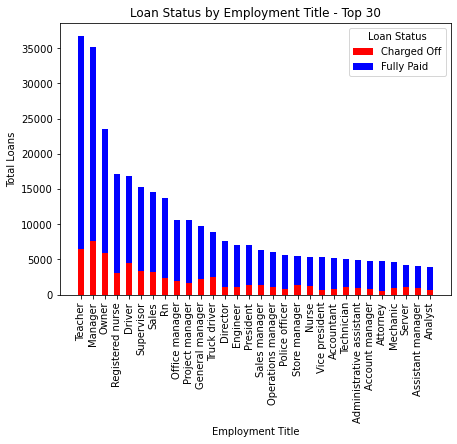

In [ ]:
fig, ax = plt.subplots()  
labels = title  
width=0.5
plt.bar(titles, charged, width, color="red")
plt.bar(titles, fully, width ,color="blue", bottom=np.array(charged))
plt.xticks(fontsize=10) 
plt.yticks(fontsize=10)
ax.set_ylabel('Total Loans')
ax.set_xlabel('Employment Title')
ax.set_title('Loan Status by Employment Title - Top 30')
ax.legend(labels=["Charged Off","Fully Paid"], title = "Loan Status")
plt.xticks(rotation='vertical')

plt.show()

In [ ]:
# Loan Status by Employment Length

In [ ]:
len_loan = df.groupby(['emp_length','loan_status'])['loan_status'].count().unstack()
len_loan['Sum'] = len_loan.iloc[:,0] + len_loan.iloc[:,1]
len_loan = len_loan.sort_values(by='Sum',ascending=False)
length = len_loan.index
charged = len_loan['Charged Off']
fully = len_loan['Fully Paid']

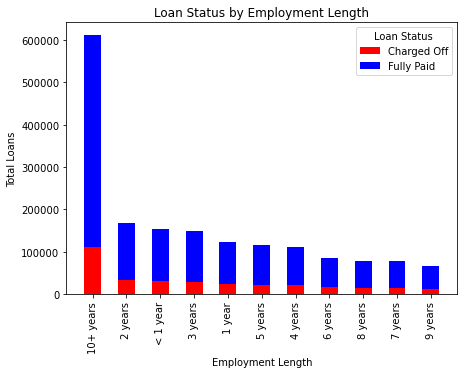

In [ ]:
fig, ax = plt.subplots()  
labels = length  
width=0.5
plt.bar(labels, charged, width, color="red")
plt.bar(labels, fully, width ,color="blue", bottom=np.array(charged))
plt.xticks(fontsize=10) 
plt.yticks(fontsize=10)
ax.set_ylabel('Total Loans')
ax.set_xlabel('Employment Length')
ax.set_title('Loan Status by Employment Length')
ax.legend(labels=["Charged Off","Fully Paid"], title = "Loan Status")
plt.xticks(rotation='vertical')

plt.show()

In [ ]:
# Loan Status by Purpose

In [ ]:
purpose_loan = df.groupby(['purpose','loan_status'])['loan_status'].count().sort_values(ascending=False).unstack()
purpose_loan['Sum'] = purpose_loan.iloc[:,0] + purpose_loan.iloc[:,1]
purpose = purpose_loan.sort_values(by='Sum',ascending=False).index
charged = purpose_loan.sort_values(by='Sum',ascending=False)['Charged Off']
fully = purpose_loan.sort_values(by='Sum',ascending=False)['Fully Paid']

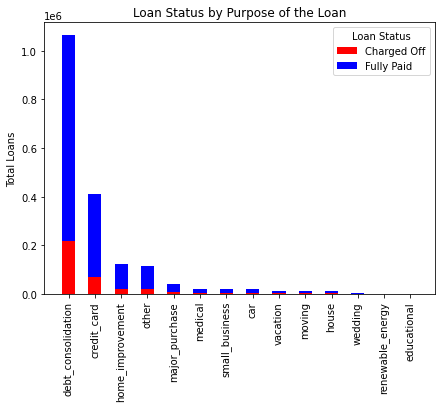

In [ ]:
fig, ax = plt.subplots()  
labels = purpose  
width=0.5
plt.bar(labels, charged, width, color="red")
plt.bar(labels, fully, width ,color="blue", bottom=np.array(charged))
plt.xticks(fontsize=10) 
plt.yticks(fontsize=10)
ax.set_ylabel('Total Loans')
ax.set_title('Loan Status by Purpose of the Loan')
ax.legend(labels=["Charged Off","Fully Paid"], title = "Loan Status")
plt.xticks(rotation='vertical')

plt.show()

In [14]:
df.verification_status.value_counts()

Source Verified    734068
Not Verified       588361
Verified           537902
Name: verification_status, dtype: int64

In [32]:
df[['verification_status']] = df[['verification_status']].apply(lambda x:x.replace('Verified','Source Verified'))

In [33]:
df[['verification_status']].value_counts()

verification_status
Source Verified        1271970
Not Verified            588361
dtype: int64

In [34]:
veri_loan = df.groupby(['verification_status','loan_status'])['loan_status'].count().unstack()
veri_loan['Sum'] = veri_loan.iloc[:,0] + veri_loan.iloc[:,1]
veri = veri_loan.sort_values(by='Sum',ascending=False).index
charged = veri_loan.sort_values(by='Sum',ascending=False)['Charged Off']
fully = veri_loan.sort_values(by='Sum',ascending=False)['Fully Paid']

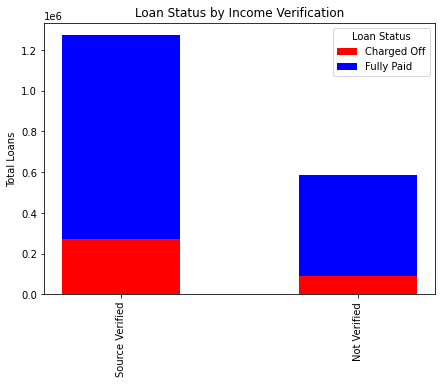

In [41]:
fig, ax = plt.subplots()  
labels = veri  
width=0.5
plt.bar(labels, charged, width, color="red")
plt.bar(labels, fully, width ,color="blue", bottom=np.array(charged))
plt.xticks(fontsize=10) 
plt.yticks(fontsize=10)
ax.set_ylabel('Total Loans')
ax.set_title('Loan Status by Income Verification')
ax.legend(labels=["Charged Off","Fully Paid"], title = "Loan Status")
plt.xticks(rotation='vertical')

plt.show()

In [ ]:
# Ideas:
# FICO => hacer una media del range (max y min) => graficar defaults y usar como variable predictora
# Analisis ROI => expected return => combinacion mas favorable => donde invierten mas los inversores ? => donde conviene invertir ?? dada la rentabilidad y posibilidad de vida de cada prestamo antes de pasar a incobrable
# Conviene mas invertir en uno grado A ? sabiendo que la rentabilidad es menor ? o en uno grado mas bajo, con mas chances de default pero mas rentabilidad
#  La tasa de interes la fija Lending Club de acuerdo a varios parametros => https://www.lendacademy.com/how-lending-club-and-prosper-set-interest-rates/
# Info de LC => https://www.lendacademy.com/lending-club-review/

## Data Preprocessing

In [36]:
# First we select the features we want to work with given the EDA performed. 

In [37]:
df = df[['term','purpose','verification_status','mort_acc','application_type','emp_length','grade','sub_grade','home_ownership','chargeoff_within_12_mths','delinq_2yrs','dti','int_rate','open_acc','pub_rec_bankruptcies','annual_inc','loan_amnt','loan_status']]

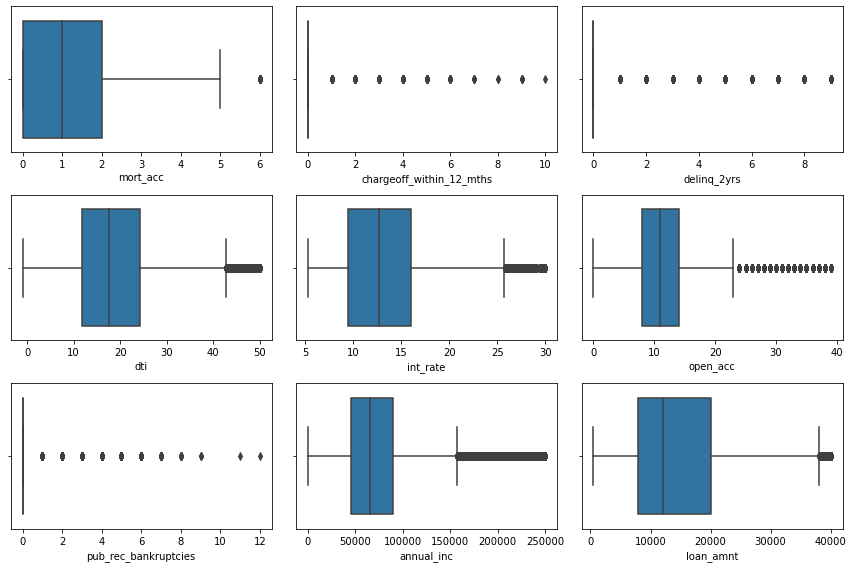

In [38]:
# We evaluate outliers

plt.figure(figsize=(12,8))

plt.subplot(3,3,1)   
sns.boxplot(df[df['mort_acc']<7]['mort_acc'])
plt.subplot(3,3,2)  
sns.boxplot(df[df['chargeoff_within_12_mths']<50]['chargeoff_within_12_mths'])
plt.subplot(3,3,3)  
sns.boxplot(df[df['delinq_2yrs']<10]['delinq_2yrs'])
plt.subplot(3,3,4)  
sns.boxplot(df[df['dti']<50]['dti'])
plt.subplot(3,3,5)  
sns.boxplot(df[df['int_rate']<30]['int_rate'])
plt.subplot(3,3,6)  
sns.boxplot(df[df['open_acc']<40]['open_acc'])
plt.subplot(3,3,7)  
sns.boxplot(df[df['pub_rec_bankruptcies']<20]['pub_rec_bankruptcies'])
plt.subplot(3,3,8)  
sns.boxplot(df[df['annual_inc']<250000]['annual_inc'])
plt.subplot(3,3,9)  
sns.boxplot(df[df['loan_amnt']<50000]['loan_amnt'])
plt.tight_layout()

plt.show()  

In [ ]:
# Deleting outliers
df = df[(df['mort_acc']<6) & (df['dti']<50) & (df['int_rate']<30) & (df['open_acc']<25) & (df['annual_inc']<250000)]

In [ ]:
df.shape

In [ ]:
# Analizing nulls per columns
df.isnull().sum()/len(df)*100

In [ ]:
# Analyzing nulls per rows
df.apply(lambda x:x.isnull().sum()/df.shape[1]*100,axis=1).value_counts()

In [ ]:
# Dropping records with nulls
df.dropna(inplace=True)

In [ ]:
df['loan_status'].value_counts()

In [ ]:
# Saving the processed data we are going to use for ML
df.to_csv('lending_club_proc.csv',index=False)

In [ ]:
df = pd.read_csv('lending_club_proc.csv')

In [ ]:
# Splitting the data into train, validation and test
# Test to use with the final model
df_test = df.sample(int(len(df)*0.1))  
# Rest of the data used for train and validation
df = df.drop(df_test.index)

In [ ]:
# Saving the processed data we are going to use for ML devided in train and test
df_test.to_csv('lending_club_test.csv',index=False)
df.to_csv('lending_club_train.csv',index=False)

In [ ]:
df = pd.read_csv('lending_club_train.csv')

In [ ]:
df.head()

,term,purpose,verification_status,mort_acc,application_type,emp_length,grade,sub_grade,home_ownership,chargeoff_within_12_mths,delinq_2yrs,dti,int_rate,open_acc,pub_rec_bankruptcies,annual_inc,loan_amnt,loan_status
0,36 months,debt_consolidation,Not Verified,0.0,Individual,4 years,B,B2,RENT,0.0,0.0,4.62,10.99,15.0,0.0,60000.0,12000.0,Fully Paid
1,36 months,home_improvement,Source Verified,0.0,Individual,2 years,B,B2,MORTGAGE,0.0,0.0,2.49,10.99,3.0,0.0,39600.0,4800.0,Fully Paid
2,36 months,debt_consolidation,Verified,4.0,Individual,10+ years,B,B2,OWN,0.0,0.0,22.87,10.99,14.0,0.0,55000.0,27050.0,Fully Paid
3,36 months,debt_consolidation,Not Verified,1.0,Individual,3 years,A,A3,MORTGAGE,0.0,0.0,12.61,7.62,17.0,0.0,96500.0,12000.0,Fully Paid
4,36 months,debt_consolidation,Not Verified,0.0,Individual,4 years,B,B4,RENT,0.0,1.0,10.02,12.85,6.0,1.0,88000.0,14000.0,Fully Paid


In [ ]:
# Separating numerical and categorical variables (leaving out emp_title)

In [ ]:
df_cat = df[['term','purpose','verification_status','application_type','emp_length','grade','sub_grade','home_ownership','chargeoff_within_12_mths','delinq_2yrs','pub_rec_bankruptcies','loan_status']].reset_index(drop=True)

In [ ]:
df_cat.head()

,term,purpose,verification_status,application_type,emp_length,grade,sub_grade,home_ownership,chargeoff_within_12_mths,delinq_2yrs,pub_rec_bankruptcies,loan_status
0,36 months,debt_consolidation,Not Verified,Individual,4 years,B,B2,RENT,0.0,0.0,0.0,Fully Paid
1,36 months,home_improvement,Source Verified,Individual,2 years,B,B2,MORTGAGE,0.0,0.0,0.0,Fully Paid
2,36 months,debt_consolidation,Verified,Individual,10+ years,B,B2,OWN,0.0,0.0,0.0,Fully Paid
3,36 months,debt_consolidation,Not Verified,Individual,3 years,A,A3,MORTGAGE,0.0,0.0,0.0,Fully Paid
4,36 months,debt_consolidation,Not Verified,Individual,4 years,B,B4,RENT,0.0,1.0,1.0,Fully Paid


In [ ]:
# Converting some numeric variables to categorical (0 and 1)
# chargeoff_within_12_mths, 0 if no charge off in the last 12 mnths, 1 if at least 1 charge off
df_cat['chargeoff_within_12_mths'] = df_cat['chargeoff_within_12_mths'].apply(lambda x:0 if x==0 else 1)
# delinq_2yrs, 0 if no delinquency in the last 2 years, 1 if at least 1 delinquency
df_cat['delinq_2yrs'] = df_cat['delinq_2yrs'].apply(lambda x:0 if x==0 else 1)
# pub_rec_bankruptcies, 0 if no pub record bankruptcies, 1 if at least 1 bankruptcy
df_cat['pub_rec_bankruptcies'] = df_cat['pub_rec_bankruptcies'].apply(lambda x:0 if x==0 else 1)

In [ ]:
# Converting seme categorical variables to 0 and 1
# term, 0 if term equals 36 months, 1 if term is 36 months
df_cat['term'] = df_cat.term.apply(lambda x: 0 if x ==' 36 months' else 1)
# application_type, 0 if application type is individual, 1 if joint
df_cat['application_type'] = df_cat.term.apply(lambda x: 0 if x == 'Individual' else 1)

In [ ]:
# Converting loan_status to 0 and 1 with label encoder
from sklearn.preprocessing import LabelEncoder   
class_labelEncoding = LabelEncoder()
class_labelEncoding.fit(df_cat["loan_status"].values)
clase = class_labelEncoding.transform(df_cat["loan_status"].values)
clase

array([1, 1, 1, ..., 0, 1, 0])

In [ ]:
df_cat['loan_status'] = clase

In [ ]:
df_cat.head()

,term,purpose,verification_status,application_type,emp_length,grade,sub_grade,home_ownership,chargeoff_within_12_mths,delinq_2yrs,pub_rec_bankruptcies,loan_status
0,0,debt_consolidation,Not Verified,1,4 years,B,B2,RENT,0,0,0,1
1,0,home_improvement,Source Verified,1,2 years,B,B2,MORTGAGE,0,0,0,1
2,0,debt_consolidation,Verified,1,10+ years,B,B2,OWN,0,0,0,1
3,0,debt_consolidation,Not Verified,1,3 years,A,A3,MORTGAGE,0,0,0,1
4,0,debt_consolidation,Not Verified,1,4 years,B,B4,RENT,0,1,1,1


In [ ]:
# Converting the rest of categorical variables to dummy variables and putting all categoricals together
df_categorical = pd.DataFrame()
for j in df_cat.columns:
    if len(df_cat[j].unique())>2:
        df_dummy = pd.get_dummies(df_cat[j])
        df_categorical = pd.concat([df_categorical,df_dummy],axis=1).reset_index(drop=True)
    else:
        df_categorical = pd.concat([df_categorical,df_cat[j]],axis=1).reset_index(drop=True)
df_categorical.head()

,term,car,credit_card,debt_consolidation,educational,home_improvement,house,major_purchase,medical,moving,other,renewable_energy,small_business,vacation,wedding,Not Verified,Source Verified,Verified,application_type,1 year,10+ years,2 years,3 years,4 years,5 years,6 years,7 years,8 years,9 years,< 1 year,A,B,C,D,E,F,G,A1,A2,A3,A4,A5,B1,B2,B3,B4,B5,C1,C2,C3,C4,C5,D1,D2,D3,D4,D5,E1,E2,E3,E4,E5,F1,F2,F3,F4,F5,G1,G2,G3,G4,G5,ANY,MORTGAGE,NONE,OTHER,OWN,RENT,chargeoff_within_12_mths,delinq_2yrs,pub_rec_bankruptcies,loan_status
0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1
1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1
2,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
3,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1
4,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,1


In [ ]:
# Joinning categorical and numerical variables

In [ ]:
df_num = df.drop(df_cat.columns,axis=1).reset_index(drop=True)

In [ ]:
df_num.shape

(1386117, 6)

In [ ]:
df_categorical.shape

(1386117, 82)

In [ ]:
df = pd.concat([df_num,df_categorical],axis=1).reset_index(drop=True)

In [ ]:
df.head()

,mort_acc,dti,int_rate,open_acc,annual_inc,loan_amnt,term,car,credit_card,debt_consolidation,educational,home_improvement,house,major_purchase,medical,moving,other,renewable_energy,small_business,vacation,wedding,Not Verified,Source Verified,Verified,application_type,1 year,10+ years,2 years,3 years,4 years,5 years,6 years,7 years,8 years,9 years,< 1 year,A,B,C,D,E,F,G,A1,A2,A3,A4,A5,B1,B2,B3,B4,B5,C1,C2,C3,C4,C5,D1,D2,D3,D4,D5,E1,E2,E3,E4,E5,F1,F2,F3,F4,F5,G1,G2,G3,G4,G5,ANY,MORTGAGE,NONE,OTHER,OWN,RENT,chargeoff_within_12_mths,delinq_2yrs,pub_rec_bankruptcies,loan_status
0,0.0,4.62,10.99,15.0,60000.0,12000.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1
1,0.0,2.49,10.99,3.0,39600.0,4800.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1
2,4.0,22.87,10.99,14.0,55000.0,27050.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
3,1.0,12.61,7.62,17.0,96500.0,12000.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1
4,0.0,10.02,12.85,6.0,88000.0,14000.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,1


In [ ]:
# Applying PCA for dimensionality reduction

In [ ]:
# First we normalize the data
X = df.drop('loan_status',axis=1)
y = df.loan_status

In [ ]:
X.shape

(1247506, 87)

In [ ]:
X.head()

,mort_acc,dti,int_rate,open_acc,annual_inc,loan_amnt,term,car,credit_card,debt_consolidation,educational,home_improvement,house,major_purchase,medical,moving,other,renewable_energy,small_business,vacation,wedding,Not Verified,Source Verified,Verified,application_type,1 year,10+ years,2 years,3 years,4 years,5 years,6 years,7 years,8 years,9 years,< 1 year,A,B,C,D,...,A5,B1,B2,B3,B4,B5,C1,C2,C3,C4,C5,D1,D2,D3,D4,D5,E1,E2,E3,E4,E5,F1,F2,F3,F4,F5,G1,G2,G3,G4,G5,ANY,MORTGAGE,NONE,OTHER,OWN,RENT,chargeoff_within_12_mths,delinq_2yrs,pub_rec_bankruptcies
0,0.0,4.62,10.99,15.0,60000.0,12000.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1,0.0,2.49,10.99,3.0,39600.0,4800.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
2,4.0,22.87,10.99,14.0,55000.0,27050.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
3,1.0,12.61,7.62,17.0,96500.0,12000.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,0.0,10.02,12.85,6.0,88000.0,14000.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1


In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler_X = MinMaxScaler()  
scaler_X.fit(X)            
X = scaler_X.transform(X)

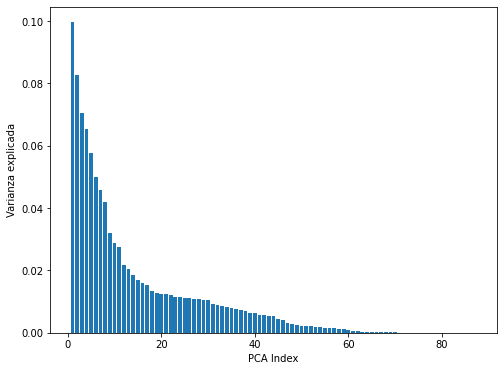

In [ ]:

pca = PCA()
X_train_pca = pca.fit_transform(X)  
pca.explained_variance_ratio_

plt.figure(figsize=(8,6))
plt.bar(range(1, 88), pca.explained_variance_ratio_)
plt.ylabel('Varianza explicada')   
plt.xlabel('PCA Index')  
plt.show()

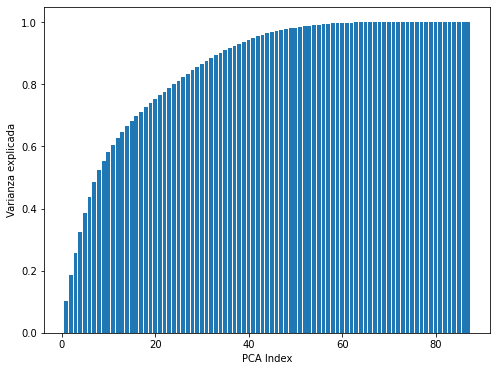

In [ ]:
# Cumulative graph of the variances
plt.figure(figsize=(8,6))
plt.bar(range(1, 88), pca.explained_variance_ratio_.cumsum())
plt.ylabel('Varianza explicada')   
plt.xlabel('PCA Index') 
plt.show()

In [ ]:
# We select a number of components of PCA of 60

In [ ]:
# Before applying PCA, we must balance the classes, using an undersampling approach since we have a great amount of data
# First we create the train, test, split of the normalized data
from sklearn.preprocessing import MinMaxScaler

X = df.drop('loan_status',axis=1)
y = df[['loan_status']].values

scaler_x = MinMaxScaler()
scaler_x.fit(X)
X_scal = scaler_x.transform(X)
X = pd.DataFrame(X_scal,columns = X.columns)

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, stratify=y)

In [ ]:
pd.DataFrame(y_train).value_counts()

1    1007254
0     240251
dtype: int64

In [ ]:
# Undersampling
from imblearn.under_sampling import RandomUnderSampler
undersampling = RandomUnderSampler(sampling_strategy=1) 
X_balanced, y_balanced = undersampling.fit_resample(X_train, y_train)

In [ ]:
pd.DataFrame(y_balanced).value_counts()

1    240251
0    240251
dtype: int64

In [ ]:
# Applying PCA to X_train and X_test
pca = PCA(n_components=60)   
X_train_pca = pca.fit_transform(X_balanced) 
X_test_pca = pca.transform(X_test)

In [ ]:
X_train_pca.shape

(480502, 60)

In [ ]:
# Neural Network

In [ ]:
model = Sequential()
model.add(Dense(150, input_shape=(X_train_pca.shape[1],), activation='sigmoid')) 
model.add(Dropout(0.1))
model.add(Dense(100, activation='sigmoid'))
model.add(Dense(50, activation='sigmoid'))
model.add(Dense(1, activation='sigmoid'))
model.summary() 

# compile the model
optimizer = keras.optimizers.Adam(lr=0.01)
model.compile(optimizer=optimizer, 
              loss='binary_crossentropy',
              metrics=['accuracy'])

# early stopping callback
# This callback will stop the training when there is no improvement in  
# the validation loss for 10 consecutive epochs.  
es = EarlyStopping(monitor='val_accuracy', 
                                   mode='max', # don't minimize the accuracy!
                                   patience=10,
                                   restore_best_weights=True)

# now we just update our model fit call
history = model.fit(X_train_pca,
                    y_balanced,
                    callbacks=[es],
                    validation_data=(X_test_pca, y_test),
                    epochs=50, 
                    batch_size=10,
                    verbose=1)

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 150)               9150      
                                                                 
 dropout_3 (Dropout)         (None, 150)               0         
                                                                 
 dense_13 (Dense)            (None, 100)               15100     
                                                                 
 dense_14 (Dense)            (None, 50)                5050      
                                                                 
 dense_15 (Dense)            (None, 1)                 51        
                                                                 
Total params: 29,351
Trainable params: 29,351
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
43206/43206 [==========================

In [ ]:
# evaluation of the model
test_loss, test_acc = model.evaluate(X_test_pca, y_test) 


3899/3899 [==============================] - 7s 2ms/step - loss: 0.5607 - accuracy: 0.7734


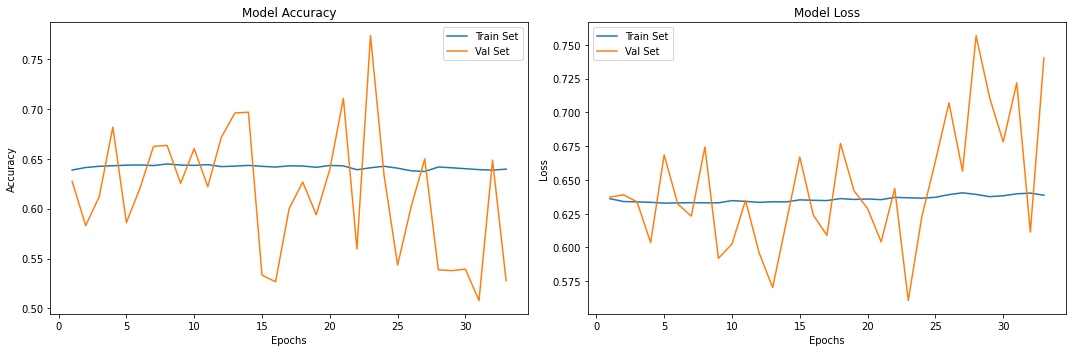

In [ ]:
# plot model performance
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(1, len(history.epoch) + 1)

plt.figure(figsize=(15,5))

plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Train Set')
plt.plot(epochs_range, val_acc, label='Val Set')
plt.legend(loc="best")
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Model Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Train Set')
plt.plot(epochs_range, val_loss, label='Val Set')
plt.legend(loc="best")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Model Loss')

plt.tight_layout()
plt.show()

In [ ]:
yhat = model.predict(X_test_pca)
yhat = np.array([0 if i<0.5 in yhat else 1])

Jaccard index:  0.7464731343168836
Accuracy:  0.7620913052260988
Precision:  0.8424669420053448
Recall:  0.8675715038823414
F1-score:  0.8548349466696599


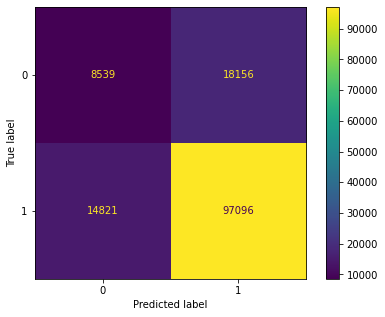

In [ ]:
print("Jaccard index: " , jaccard_score(y_test,yhat))
print("Accuracy: " , accuracy_score(y_test,yhat))
print("Precision: ", precision_score(y_test,yhat))
print("Recall: ", recall_score(y_test,yhat))
print("F1-score: ", f1_score(y_test,yhat))
cmNB = confusion_matrix(y_test,yhat)
disp = ConfusionMatrixDisplay(confusion_matrix=cmNB)
disp.plot()

Area under the curve:  0.5937220696036543


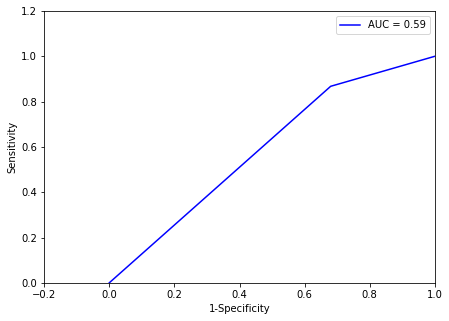

In [ ]:
fpr, tpr, threshold = roc_curve(y_test, yhat)
roc_auc = auc(fpr, tpr)
print("Area under the curve: ",auc(fpr, tpr))
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.xlim([-0.2, 1])
plt.ylim([0, 1.2])
plt.legend()
plt.ylabel('Sensitivity')
plt.xlabel('1-Specificity')
plt.show()

In [ ]:
# save and load the model
model.save("model.h5")

In [ ]:
model = keras.models.load_model('model.h5')

In [ ]:
# XGBoost

0.6345925682803506
0.6342810797109573
0.6345925692923162
0.6345925692923162
{'criterion': 'gini', 'n_estimators': 100}
[[17718  8977]
 [43982 67935]]


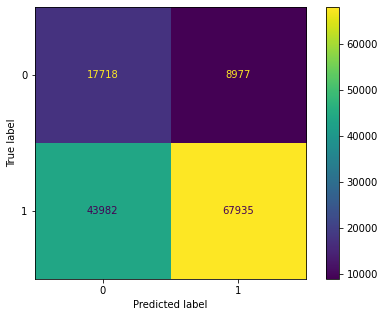

In [ ]:
# The parameters tested, the more computationally expensive the model
params={'n_estimators': [100],  
        'criterion':['gini'], 
        #'max_depth': [3,4,5],
        #'max_features': [2, 3],
        #'max_leaf_nodes': [8,20],
        #'min_impurity_decrease' : [0.02,0.3],
        #'min_samples_split': [2,5] 
        }
scorers = {"f1_macro","accuracy","recall_macro"}  
clf_xgb = RandomForestClassifier()
grid_solver = GridSearchCV(estimator = clf_xgb, 
                   param_grid = params, 
                   scoring=scorers,
                   cv = 5,
                   refit="accuracy",
                   n_jobs=-1)

model_result = grid_solver.fit(X_train_pca,y_balanced) # Puedo entrenar el modelo definitivo sobre el total del dataset ya que usa un kfold.

print(model_result.cv_results_["mean_test_recall_macro"].mean())
print(model_result.cv_results_["mean_test_f1_macro"].mean())
print(model_result.cv_results_["mean_test_accuracy"].mean())
print(model_result.best_score_)
print(model_result.best_params_)
clf_xgb = model_result.best_estimator_
clf_xgb = clf_xgb.fit(X_train_pca, y_balanced)
yhat = clf_xgb.predict(X_test_pca)
accuracy_score(y_test,yhat)
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, yhat)
print(cm)
dispRFG = ConfusionMatrixDisplay(confusion_matrix=cm)
dispRFG.plot()

Area under the curve:  0.6353660686082613


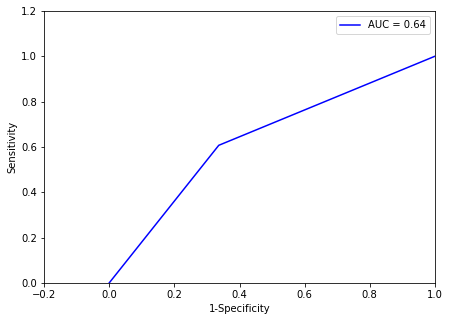

In [ ]:
fpr, tpr, threshold = roc_curve(y_test, yhat)
roc_auc = auc(fpr, tpr)
print("Area under the curve: ",auc(fpr, tpr))
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.xlim([-0.2, 1])
plt.ylim([0, 1.2])
plt.legend()
plt.ylabel('Sensitivity')
plt.xlabel('1-Specificity')
plt.show()

In [ ]:
import pickle
file_name = "clf_xgb.pkl"

# save
pickle.dump(clf_xgb, open(file_name, "wb"))

# load
xgb_model_loaded = pickle.load(open(file_name, "rb"))


In [ ]:
# Logistic Regression

In [ ]:
%%time
from sklearn.linear_model import LogisticRegression
clf_log = LogisticRegression(max_iter=150)
clf_log.fit(X_train_pca, y_balanced)
yhat = clf_log.predict(X_test_pca)
print(accuracy_score(y_test, yhat))

0.631626410411797
CPU times: user 7.64 s, sys: 2.27 s, total: 9.91 s
Wall time: 5.2 s


Jaccard index:  0.5767700545397278
Accuracy:  0.631626410411797
Precision:  0.8885384477871134
Recall:  0.6217554080255904
F1-score:  0.7315842318023876


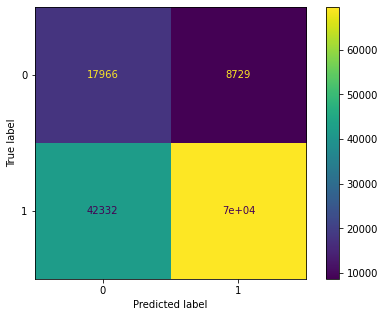

In [ ]:
print("Jaccard index: " , jaccard_score(y_test,yhat))
print("Accuracy: " , accuracy_score(y_test,yhat))
print("Precision: ", precision_score(y_test,yhat))
print("Recall: ", recall_score(y_test,yhat))
print("F1-score: ", f1_score(y_test,yhat))
cmNB = confusion_matrix(y_test,yhat)
disp = ConfusionMatrixDisplay(confusion_matrix=cmNB)
disp.plot()

Area under the curve:  0.6473826674891017


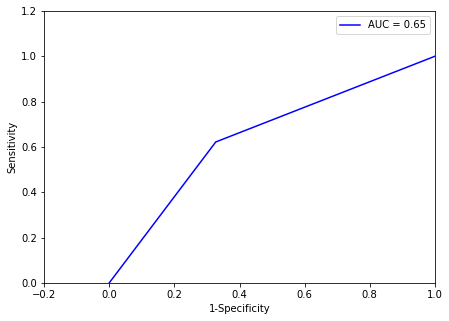

In [ ]:
fpr, tpr, threshold = roc_curve(y_test, yhat)
roc_auc = auc(fpr, tpr)
print("Area under the curve: ",auc(fpr, tpr))
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.xlim([-0.2, 1])
plt.ylim([0, 1.2])
plt.legend()
plt.ylabel('Sensitivity')
plt.xlabel('1-Specificity')
plt.show()

In [ ]:
# Stacking the three models

In [ ]:
# We use the test set
df_test = pd.read_csv('lending_club_test.csv')

In [ ]:
df_cat = df_test[['term','purpose','verification_status','application_type','emp_length','grade','sub_grade','home_ownership','chargeoff_within_12_mths','delinq_2yrs','pub_rec_bankruptcies','loan_status']].reset_index(drop=True)

In [ ]:
# Converting some numeric variables to categorical (0 and 1)
# chargeoff_within_12_mths
df_cat['chargeoff_within_12_mths'] = df_cat['chargeoff_within_12_mths'].apply(lambda x:0 if x==0 else 1)
# delinq_2yrs
df_cat['delinq_2yrs'] = df_cat['delinq_2yrs'].apply(lambda x:0 if x==0 else 1)
# pub_rec_bankruptcies
df_cat['pub_rec_bankruptcies'] = df_cat['pub_rec_bankruptcies'].apply(lambda x:0 if x==0 else 1)
# Converting seme categorical variables to 0 and 1
# term
df_cat['term'] = df_cat.term.apply(lambda x: 0 if x ==' 36 months' else 1)
# application_type
df_cat['application_type'] = df_cat.term.apply(lambda x: 0 if x == 'Individual' else 1)
# Converting loan_status to 0 and 1 with label encoder
from sklearn.preprocessing import LabelEncoder   
class_labelEncoding = LabelEncoder()
class_labelEncoding.fit(df_cat["loan_status"].values)
clase = class_labelEncoding.transform(df_cat["loan_status"].values)
df_cat['loan_status'] = clase
# Converting the rest of categorical variables to dummy variables and putting all categoricals together
df_categorical = pd.DataFrame()
for j in df_cat.columns:
    if len(df_cat[j].unique())>2:
        df_dummy = pd.get_dummies(df_cat[j])
        df_categorical = pd.concat([df_categorical,df_dummy],axis=1).reset_index(drop=True)
    else:
        df_categorical = pd.concat([df_categorical,df_cat[j]],axis=1).reset_index(drop=True)

In [ ]:
df_categorical.head()

,term,car,credit_card,debt_consolidation,home_improvement,house,major_purchase,medical,moving,other,renewable_energy,small_business,vacation,wedding,Not Verified,Source Verified,Verified,application_type,1 year,10+ years,2 years,3 years,4 years,5 years,6 years,7 years,8 years,9 years,< 1 year,A,B,C,D,E,F,G,A1,A2,A3,A4,A5,B1,B2,B3,B4,B5,C1,C2,C3,C4,C5,D1,D2,D3,D4,D5,E1,E2,E3,E4,E5,F1,F2,F3,F4,F5,G1,G2,G3,G4,G5,ANY,MORTGAGE,NONE,OTHER,OWN,RENT,chargeoff_within_12_mths,delinq_2yrs,pub_rec_bankruptcies,loan_status
0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1
1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
3,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1
4,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1


In [ ]:
# Joinning categorical and numerical variables
df_num = df_test.drop(df_cat.columns,axis=1).reset_index(drop=True)
df = pd.concat([df_num,df_categorical],axis=1).reset_index(drop=True)

In [ ]:
df.head()

,mort_acc,dti,int_rate,open_acc,annual_inc,loan_amnt,term,car,credit_card,debt_consolidation,home_improvement,house,major_purchase,medical,moving,other,renewable_energy,small_business,vacation,wedding,Not Verified,Source Verified,Verified,application_type,1 year,10+ years,2 years,3 years,4 years,5 years,6 years,7 years,8 years,9 years,< 1 year,A,B,C,D,E,F,G,A1,A2,A3,A4,A5,B1,B2,B3,B4,B5,C1,C2,C3,C4,C5,D1,D2,D3,D4,D5,E1,E2,E3,E4,E5,F1,F2,F3,F4,F5,G1,G2,G3,G4,G5,ANY,MORTGAGE,NONE,OTHER,OWN,RENT,chargeoff_within_12_mths,delinq_2yrs,pub_rec_bankruptcies,loan_status
0,2.0,32.28,17.74,6.0,95000.0,37025.0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1
1,0.0,20.19,15.05,16.0,175000.0,24000.0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
2,0.0,19.10,20.00,12.0,60000.0,5600.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
3,0.0,20.80,18.49,13.0,46500.0,9800.0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1
4,3.0,20.23,7.26,12.0,90000.0,35000.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1


In [ ]:
# Normalizing the data
X_test = df.drop('loan_status',axis=1)
y_test = df[['loan_status']].values

scaler_x.fit(X_test)
X_scal = scaler_x.transform(X_test)
X_test = pd.DataFrame(X_scal,columns = X_test.columns)

In [ ]:
# Applying PCA to X_test
X_test_pca = pca.fit_transform(X_test) 

In [ ]:
# Predictions of NN => The first input of the Meta Model
input_1 = keras.models.load_model('model.h5') 
input_1 = input_1.predict(X_test_pca)

In [ ]:
input_1.shape

(154013, 1)

In [ ]:
# Predictions of XGBoost => The second input of the Meta Model
input_2 = clf_xgb.predict_proba(X_test_pca) 

In [ ]:
input_2.shape

(154013, 2)

In [ ]:
# Predictions of Logit Regression => The third input of the Meta Model
input_3 = clf_log.predict_proba(X_test_pca) 

In [ ]:
input_3

array([[0.65160333, 0.34839667],
       [0.69053893, 0.30946107],
       [0.78695599, 0.21304401],
       ...,
       [0.51220253, 0.48779747],
       [0.40173208, 0.59826792],
       [0.25184263, 0.74815737]])

In [ ]:
# X, y to train and test the Meta Model
X = np.concatenate([input_1,input_2,input_3],axis=1)
y = y_test

In [ ]:
X

array([[0.52291518, 0.53      , 0.47      , 0.65160333, 0.34839667],
       [0.38606203, 0.51      , 0.49      , 0.69053893, 0.30946107],
       [0.49776313, 0.54      , 0.46      , 0.78695599, 0.21304401],
       ...,
       [0.52293831, 0.53      , 0.47      , 0.51220253, 0.48779747],
       [0.67505258, 0.49      , 0.51      , 0.40173208, 0.59826792],
       [0.675053  , 0.41      , 0.59      , 0.25184263, 0.74815737]])

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, stratify=y)

# Undersampling
from imblearn.under_sampling import RandomUnderSampler
undersampling = RandomUnderSampler(sampling_strategy=1) 
X_balanced, y_balanced = undersampling.fit_resample(X_train, y_train)

In [ ]:
# Logistic Regression using predictions as input
%%time
from sklearn.linear_model import LogisticRegression
clf_log = LogisticRegression(max_iter=150)
clf_log.fit(X_balanced, y_balanced)
yhat = clf_log.predict(X_test)
print(accuracy_score(y_test, yhat))

0.6134268276847162
CPU times: user 164 ms, sys: 136 ms, total: 301 ms
Wall time: 160 ms


Jaccard index:  0.559191530317613
Accuracy:  0.6134268276847162
Precision:  0.8766248839368617
Recall:  0.6069591771134684
F1-score:  0.7172839506172839


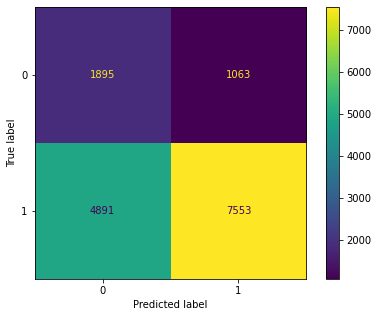

In [ ]:
print("Jaccard index: " , jaccard_score(y_test,yhat))
print("Accuracy: " , accuracy_score(y_test,yhat))
print("Precision: ", precision_score(y_test,yhat))
print("Recall: ", recall_score(y_test,yhat))
print("F1-score: ", f1_score(y_test,yhat))
cmNB = confusion_matrix(y_test,yhat)
disp = ConfusionMatrixDisplay(confusion_matrix=cmNB)
disp.plot()

Area under the curve:  0.6237973708420621


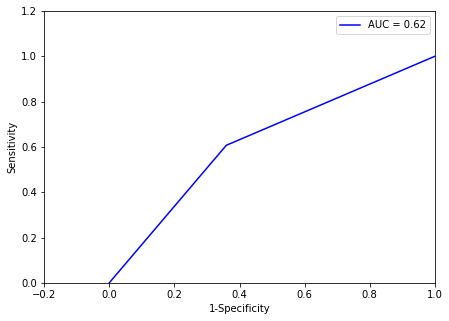

In [ ]:
fpr, tpr, threshold = roc_curve(y_test, yhat)
roc_auc = auc(fpr, tpr)
print("Area under the curve: ",auc(fpr, tpr))
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.xlim([-0.2, 1])
plt.ylim([0, 1.2])
plt.legend()
plt.ylabel('Sensitivity')
plt.xlabel('1-Specificity')
plt.show()

In [ ]:
# On the test set we calcuate expected return of each loan using the predicted probability of the loan being paid
# The model used is the NN 
# The probability of a loan being peid = 1 - probability of loan not being paid (the probability estimated by NN)

In [ ]:
prob_loan_paid = 1 - input_1

In [ ]:
df_test['prob_loan_paid'] = prob_loan_paid
df_test['expected_return'] = df_test.prob_loan_paid * df_test.int_rate

In [ ]:
# Filtering the rows we are using for the portfolio and to calculate the expected return of it with our model

In [ ]:
# Diversified portfolio, with one loan of each grade
div_port = df_test.sort_values('expected_return').drop_duplicates(['grade'],keep='last')  

In [ ]:
div_port

,term,purpose,verification_status,mort_acc,application_type,emp_length,grade,sub_grade,home_ownership,chargeoff_within_12_mths,delinq_2yrs,dti,int_rate,open_acc,pub_rec_bankruptcies,annual_inc,loan_amnt,loan_status,prob_loan_paid,expected_return
5798,60 months,major_purchase,Source Verified,1.0,Individual,10+ years,A,A4,RENT,0.0,0.0,12.77,10.19,6.0,0.0,136000.0,35000.0,Fully Paid,0.698944,7.122239
5407,60 months,debt_consolidation,Verified,0.0,Individual,10+ years,B,B4,RENT,0.0,0.0,28.18,13.11,4.0,0.0,60000.0,26200.0,Fully Paid,0.701455,9.196073
35222,60 months,debt_consolidation,Source Verified,0.0,Individual,2 years,C,C5,RENT,0.0,0.0,28.73,17.74,15.0,0.0,92000.0,16800.0,Fully Paid,0.698944,12.399266
75395,60 months,debt_consolidation,Not Verified,0.0,Joint App,3 years,D,D5,OWN,0.0,1.0,7.42,28.80,6.0,0.0,39000.0,20000.0,Charged Off,0.698944,20.129586
43637,60 months,debt_consolidation,Source Verified,0.0,Individual,3 years,E,E5,RENT,0.0,0.0,24.46,29.00,5.0,0.0,60000.0,20000.0,Charged Off,0.698944,20.269375
110665,60 months,debt_consolidation,Source Verified,1.0,Individual,4 years,G,G4,MORTGAGE,0.0,0.0,16.35,29.96,12.0,0.0,50000.0,17600.0,Fully Paid,0.698944,20.940361
16745,60 months,debt_consolidation,Verified,0.0,Individual,10+ years,F,F3,RENT,0.0,0.0,26.37,29.99,9.0,0.0,53661.0,20375.0,Charged Off,0.698944,20.961330


In [ ]:
# Annual expected return of a diversified portfolio using the NN model
sum(div_port['expected_return'])

111.01823137521743

In [ ]:
# Real annual return of a diversified portfolio
sum(div_port[div_port['loan_status']=='Fully Paid']['int_rate'])

71.0

In [ ]:
# Calculating a conservative portfolio
df_test[df_test['grade']=='G'].sort_values('expected_return',ascending=False)[['expected_return']].iloc[:5,:].values.sum()

104.70180709362029

In [ ]:
df_test[df_test['grade']=='G'].sort_values('int_rate',ascending=False)[['int_rate']].iloc[:5,:].values.sum()

149.8